In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from AISDataManager import AISDataManager
import Constants as c
import pandas as pd

import os
import matplotlib.animation as animation
from IPython.display import HTML

#config parser
import configparser

#MyConfig.INI stores all the run time constants
config = configparser.ConfigParser()
config.read('MyConfig.INI')

from joblib import Parallel, delayed
import multiprocessing

#make object of AIS data manager
aISDM = AISDataManager()

-119.5 32.0
-117.1 34.2


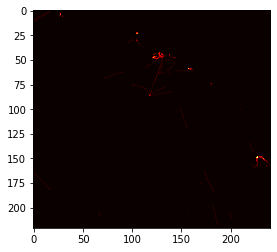

In [3]:
lonMin = (float)(config['REGEION']['LON_MIN'])
lonMax = (float)(config['REGEION']['LON_MAX'])

latMin = (float)(config['REGEION']['LAT_MIN'])
latMax = (float)(config['REGEION']['LAT_MAX'])

print(lonMin,latMin)
print(lonMax,latMax)

increStep = 0.01
incrRes = 2

xGrid = np.arange(lonMin,lonMax,increStep)
xGrid = np.around(xGrid,incrRes)
yGrid = np.arange(latMin,latMax,increStep)
yGrid = np.around(yGrid,incrRes)

heatMapVal = np.load("./Data/AIS_2017_LA/LAPort/HourlyHeatMap/0.npy")
heatMapImage = np.reshape(heatMapVal,(yGrid.shape[0],xGrid.shape[0]))
heatMapImage = np.flip(heatMapImage,axis=0)
plt.imshow(heatMapImage,cmap=plt.get_cmap('hot'))

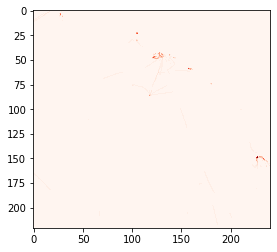

In [4]:
plt.imshow(heatMapImage,cmap=plt.get_cmap('Reds'))

In [6]:
counter = 0
for i in range(heatMapVal.shape[0]):
    if(heatMapVal[i] > 0):
        print(heatMapVal[i])
        counter = counter + 1
print("*********************************")
print(counter)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
3.0
1.0
1.0
1.0
2.0
2.0
1.0
2.0
2.0
1.0
1.0
3.0
1.0
3.0
1.0
1.0
1.0
1.0
4.0
2.0
1.0
5.0
3.0
4.0
7.0
3.0
2.0
4.0
3.0
4.0
5.0
3.0
6.0
9.0
8.0
5.0
2.0
4.0
13.0
17.0
24.0
5.0
4.0
5.0
5.0
7.0
19.0
1.0
8.0
7.0
6.0
3.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
8.0
3.0
1.0
1.0
3.0
3.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0


In [1]:
#standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn import svm
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import 6

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

#config parser
import configparser

#MyConfig.INI stores all the run time constants
config = configparser.ConfigParser()
config.read('MyConfig.INI')

Using TensorFlow backend.


['MyConfig.INI']

In [2]:
#this is the regeion of interest
lonMin = (float)(config['REGEION']['LON_MIN'])
lonMax = (float)(config['REGEION']['LON_MAX'])

latMin = (float)(config['REGEION']['LAT_MIN'])
latMax = (float)(config['REGEION']['LAT_MAX'])

print("XMin = "+str(lonMin)+"XMax = "+str(lonMax)+"YMin = "+str(latMin)+"YMax = "+str(latMax))

#FIXME get step size from somewhere else 
#our grid size is 0.01*0.01
xGrid = np.arange(lonMin,lonMax,0.01)
xGrid = np.around(xGrid,2)
yGrid = np.arange(latMin,latMax,0.01)
yGrid = np.around(yGrid,2)

print("XGrid = ",xGrid.shape[0])
print("YGrid = ",yGrid.shape[0])

#Hourly Histogram Path
dataDirectory = config['HISTOGRAM_PREDICT_GENERAL']['DATA_DIRECTORY_PATH']
#first file
dataStartIndex = (int)(config['HISTOGRAM_PREDICT_GENERAL']['DATA_START_INDEX'])
#last file
dataEndIndex = (int)(config['HISTOGRAM_PREDICT_GENERAL']['DATA_END_INDEX'])

fileNameList = []

#generate files list
#generates name of all the files
for i in range(dataStartIndex,dataEndIndex):
    fileStr = dataDirectory+('%04d'%(i))+'.npy'
    fileNameList.append(fileStr)

#read ROI parameters
rOILonMin = (float)(config['HISTOGRAM_PREDICT_GENERAL']['ROI_LON_MIN'])
rOILonMax = (float)(config['HISTOGRAM_PREDICT_GENERAL']['ROI_LON_MAX'])

rOILatMin = (float)(config['HISTOGRAM_PREDICT_GENERAL']['ROI_LAT_MIN'])
rOILatMax = (float)(config['HISTOGRAM_PREDICT_GENERAL']['ROI_LAT_MAX'])

rOIBW = (int)(config['HISTOGRAM_PREDICT_GENERAL']['ROI_BW'])

#now based on ROI boundaries
#lets try to identify x and y values of the cell
print(rOILonMin,rOILonMax)
print(rOILatMin,rOILatMax)
rOILonMinIndex = np.where(xGrid == rOILonMin)
rOILonMaxIndex = np.where(xGrid == rOILonMax)

rOILatMinIndex = np.where(yGrid == rOILatMin)
rOILatMaxIndex = np.where(yGrid == rOILatMax)

#FIXME check for index out of bound
print(rOILonMinIndex[0][0],rOILonMaxIndex[0][0])
print(rOILatMinIndex[0][0],rOILatMaxIndex[0][0])

XMin = -167.5XMax = -165.5YMin = 53.0YMax = 55.0
XGrid =  200
YGrid =  200
-166.65 -166.64
53.94 53.95
85 86
94 95


In [3]:
def generate_region_data(bW):
    global rOILonMinIndex,rOILatMaxIndex,xGrid,yGrid,fileNameList
    
    #now lets consider window of -BW and +BW
    #now we can get the input window slicer by adding and subtracting BW
    #we got the index of horizontal array
    rOISliceXMin = rOILonMinIndex[0][0] - bW
    #check for less than 0
    if(rOISliceXMin < 0):
        rOISliceXMin = 0
    rOISliceXMax = rOILonMinIndex[0][0] + bW
    if(rOISliceXMax > xGrid.shape[0]):
        rOISliceXMax = xGrid.shape[0]
    print(rOISliceXMin,rOISliceXMax)

    #do for y also
    rOISliceYMin = rOILatMinIndex[0][0] - bW
    #check for less than 0
    if(rOISliceYMin < 0):
        rOISliceYMin = 0
    rOISliceYMax = rOILatMinIndex[0][0] + bW
    if(rOISliceYMax > yGrid.shape[0]):
        rOISliceYMax = yGrid.shape[0]
    print(rOISliceYMin,rOISliceYMax)

    #Read Histogram Data
    histData = []
    histLabel = []
    #first read everything
    #now lets phrase time series forcasting problem as regression problem
    for fileName in fileNameList:
        #read data from a file
        #the histogram values considering minimum area
        histNP = np.fromfile(fileName)
        #reshape it in 2D fashion
        histNP = histNP.reshape((xGrid.shape[0],yGrid.shape[0]))
        #now slice the array 
        #here it has to be window
        #the regeion we are interested
        #and some cells which are near to this regeion
        histNPX = histNP[rOISliceXMin:rOISliceXMax,rOISliceYMin:rOISliceYMax].copy()
        #now append this into the list
        histData.append(histNPX.flatten())

        #after that we have our own regeion
        histNPY = histNP[rOILonMinIndex[0][0]:rOILonMaxIndex[0][0],rOILatMinIndex[0][0]:rOILatMaxIndex[0][0]].copy()
        #we need to add things up for label
        histY = np.sum(histNPY)
        #append that into label
        histLabel.append(histY)
        
    histLabelNP = np.asarray(histLabel)    
    histLabelNP = histLabelNP.reshape(histLabelNP.shape[0],1)
    return np.asarray(histData),histLabelNP

#this function will normalise the given matrix
#will also return mean and range for a dataset
#which is handy for the future inputs
def normalise_matrix(mat):
    retVal = mat.copy()
    
    #FIXME check for numpy type
    meanRow = mat.mean(axis=0);
    maxRow = mat.max(axis=0);
    minRow = mat.min(axis=0);
    #compute range
    rangeRow = maxRow - minRow
    #to get rid of 0 range
    #which is as good as having constant data
    #we are dividing by range
    #for such feature instead of dividing by 0
    #we should divide by 1
    #this replaces 0's with 1 WAOW
    rangeRow[rangeRow == 0] = 1
    
    #mean matrix is something
    #and range matrix will be used for normalisation
    meanMat = mat.copy()
    rangeMat = mat.copy()
    
    #FIXME can we use something else instead of for loop
    #iterate for number of rows
    for i in range(meanMat.shape[0]):
        meanMat[i] = meanRow
        
    for i in range(rangeMat.shape[0]):
        rangeMat[i] = rangeRow
    
    #subtract the mean
    retVal = mat - meanMat
    #divide by the range
    retVal = retVal/rangeMat
    return retVal,meanRow,rangeRow;

#will make a data set for time series forcast
#will consider how many previous data we want to consider
#will also take the feature matrix 
#and output feature
#will return matrix of reduced dimension
#which can be used as a feature factor
def make_time_series_data(matX,matY,pastFeatures,bias = 0,futureFeature = 0):
    #first make data set for time series regression
    #so based on past features to consider
    #we will have data set limited by that number
    noRowsX = matX.shape[0] - pastFeatures - futureFeature

    #initialise m*n dimensional array for X(where n is number of past features)
    #where m is total number data points for the training and testing
    #m will be noRowsX
    if bias == 0:
        retXMat = np.zeros(shape=(noRowsX,(pastFeatures*matX.shape[1])))
    else:
        #one extra column for bias
        retXMat = np.zeros(shape=(noRowsX,1+(pastFeatures*matX.shape[1])))
        
    #initialise noRowsX*column dimensional array for Y
    retYMat = np.zeros(shape=(noRowsX,matY.shape[1]))
    
    for i in range(0,noRowsX):
        #numpy array with zero element
        if bias == 0:
            temp = np.zeros(0)
        else:
            temp = np.zeros(1)
            temp[0] = 1;
        
        for j in range(i,i+pastFeatures):
            temp = np.append(temp,matX[j])
        retXMat[i] = temp
        retYMat[i] = matY[i+pastFeatures+futureFeature]
    return retXMat,retYMat,noRowsX

def make_prediction_model(space,noOfprevData,testSize,futurePredict,plotData = 0):
    #generate data according to space
    rawX,rawY = generate_region_data(space);
    
    #normalise the input as well as output vectors
    rawXNorm,rawXMean,rawXRange = normalise_matrix(rawX)
    rawYNorm,rawYMean,rawYRange = normalise_matrix(rawY)
    
    if(plotData == 1):
        plt.figure(0)

        #graph of original labels
        ax1 = plt.subplot(1,2,1)
        ax1.set_ylim(np.min(rawY),np.max(rawY))
        xAxis = np.arange(rawY.shape[0])
        plt.plot(xAxis,rawY)

        #graph of normalised label
        ax2 = plt.subplot(1,2,2)
        ax2.set_ylim(np.min(rawYNorm),np.max(rawYNorm))
        xAxis = np.arange(rawYNorm.shape[0])
        plt.plot(xAxis,rawYNorm)
    
    dataX, dataY, lenX = make_time_series_data(rawXNorm,rawYNorm,noOfprevData,1,futurePredict-1)
    print(dataX.shape)
    print(dataY.shape)

    #split the data into training and testing
    dataXTrain,dataXTest,dataYTrain,dataYTest = train_test_split(dataX,dataY,train_size = (lenX - testSize),test_size = testSize,shuffle = False)
    dataYTrain = dataYTrain.flatten()
    print(dataYTrain.shape)
    
    cS = [0.00001,0.00001,0.0001,0.001, 0.01, 0.1, 1, 10]
    gammas = [0.00001,0.00001,0.0001,0.001, 0.01, 0.1, 1]
    epsiolons = [0.00001,0.0001,0.001, 0.01, 0.1, 1]
    
    paramGrid = {'C': cS, 'gamma' : gammas, 'epsilon' : epsiolons}

    gridSearch = GridSearchCV(svm.SVR(kernel='rbf'), paramGrid)
    gridSearch.fit(dataXTrain, dataYTrain)
#     bestParams = gridSearch.best_params_
#     bestParams = gridSearch.best_estimator_
    
    sVR = gridSearch.best_estimator_
    sVR.fit(dataXTrain, dataYTrain)
    
    #lets see whats the score
    #we will return it to plot the matrix
    trainScore = sVR.score(dataXTrain,dataYTrain)
    testScore = sVR.score(dataXTest,dataYTest)
    print(trainScore)
    print(testScore)

    #now lets make some prediction on training data and plot it
    #these are the normalised values
    predTrain = sVR.predict(dataXTrain)
    predTest = sVR.predict(dataXTest)
    
    #lets denormalise them
    for i in range(predTrain.shape[0]):
        predTrain[i] = predTrain[i] * rawYRange
        predTrain[i] = predTrain[i] + rawYMean

    for i in range(predTest.shape[0]):
        predTest[i] = predTest[i] * rawYRange
        predTest[i] = predTest[i] + rawYMean
    
    yTrain = dataYTrain.copy()
    yTest = dataYTest.copy()
    
    #lets denormalise them
    for i in range(yTrain.shape[0]):
        yTrain[i] = yTrain[i] * rawYRange
        yTrain[i] = yTrain[i] + rawYMean

    for i in range(yTest.shape[0]):
        yTest[i] = yTest[i] * rawYRange
        yTest[i] = yTest[i] + rawYMean
        

    if(plotData == 1):
        #use that as reference
        #and plot it
        plt.figure(1)

        ax3 = plt.subplot(1,2,1)
        ax3.set_ylim(min(np.min(predTrain),np.min(yTrain)),max(np.max(predTrain),np.max(yTrain)))
        xAxis = np.arange(yTrain.shape[0])
        plt.plot(xAxis,yTrain)

        ax4 = plt.subplot(1,2,2)
        ax4.set_ylim(min(np.min(predTrain),np.min(yTrain)),max(np.max(predTrain),np.max(yTrain)))
        xAxis = np.arange(predTrain.shape[0])
        plt.plot(xAxis,predTrain)
        
    if(plotData == 1):
        plt.figure(2)

        ax5 = plt.subplot(1,2,1)
        ax5.set_ylim(min(np.min(predTest),np.min(yTest)),max(np.max(predTest),np.max(yTest)))
        xAxis = np.arange(yTest.shape[0])
        plt.plot(xAxis,yTest)

        ax6 = plt.subplot(1,2,2)
        ax6.set_ylim(min(np.min(predTest),np.min(yTest)),max(np.max(predTest),np.max(yTest)))
        xAxis = np.arange(predTest.shape[0])
        plt.plot(xAxis,predTest)

    return trainScore,testScore

In [4]:
from xgboost import XGBRegressor

def make_xgboost_prediction_model(space,noOfprevData,testSize,futurePredict,plotData = 0):
    #generate data according to space
    rawX,rawY = generate_region_data(space);
    
    #normalise the input as well as output vectors
    rawXNorm,rawXMean,rawXRange = normalise_matrix(rawX)
    rawYNorm,rawYMean,rawYRange = normalise_matrix(rawY)
    
    if(plotData == 1):
        plt.figure(0)

        #graph of original labels
        ax1 = plt.subplot(1,2,1)
        ax1.set_ylim(np.min(rawY),np.max(rawY))
        xAxis = np.arange(rawY.shape[0])
        plt.plot(xAxis,rawY)

        #graph of normalised label
        ax2 = plt.subplot(1,2,2)
        ax2.set_ylim(np.min(rawYNorm),np.max(rawYNorm))
        xAxis = np.arange(rawYNorm.shape[0])
        plt.plot(xAxis,rawYNorm)
    
    dataX, dataY, lenX = make_time_series_data(rawXNorm,rawYNorm,noOfprevData,1,futurePredict-1)
    print(dataX.shape)
    print(dataY.shape)

    #split the data into training and testing
    dataXTrain,dataXTest,dataYTrain,dataYTest = train_test_split(dataX,dataY,train_size = (lenX - testSize),test_size = testSize,shuffle = False)
    dataYTrain = dataYTrain.flatten()
    print(dataYTrain.shape)
    
    # A parameter grid for XGBoost
    params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)], \
              'subsample':[i/10.0 for i in range(6,11)], \
              'colsample_bytree':[i/10.0 for i in range(6,11)], \
              'max_depth': [2,3,4]}
    
    # Initialize XGB and GridSearch
    xgb = XGBRegressor(nthread=-1) 

    grid = GridSearchCV(xgb, params)
    grid.fit(dataXTrain, dataYTrain)
    
    myXGB = grid.best_estimator_
    myXGB.fit(dataXTrain, dataYTrain)
    #lets see whats the score
    #we will return it to plot the matrix
    trainScore = myXGB.score(dataXTrain,dataYTrain)
    testScore = myXGB.score(dataXTest,dataYTest)
    print(trainScore)
    print(testScore)
    #now lets make some prediction on training data and plot it
    #these are the normalised values
    predTrain = myXGB.predict(dataXTrain)
    predTest = myXGB.predict(dataXTest)

    #lets denormalise them
    for i in range(predTrain.shape[0]):
        predTrain[i] = predTrain[i] * rawYRange
        predTrain[i] = predTrain[i] + rawYMean

    for i in range(predTest.shape[0]):
        predTest[i] = predTest[i] * rawYRange
        predTest[i] = predTest[i] + rawYMean
    
    yTrain = dataYTrain.copy()
    yTest = dataYTest.copy()
    
    #lets denormalise them
    for i in range(yTrain.shape[0]):
        yTrain[i] = yTrain[i] * rawYRange
        yTrain[i] = yTrain[i] + rawYMean

    for i in range(yTest.shape[0]):
        yTest[i] = yTest[i] * rawYRange
        yTest[i] = yTest[i] + rawYMean
        

    if(plotData == 1):
        #use that as reference
        #and plot it
        plt.figure(1)

        ax3 = plt.subplot(1,2,1)
        ax3.set_ylim(min(np.min(predTrain),np.min(yTrain)),max(np.max(predTrain),np.max(yTrain)))
        xAxis = np.arange(yTrain.shape[0])
        plt.plot(xAxis,yTrain)

        ax4 = plt.subplot(1,2,2)
        ax4.set_ylim(min(np.min(predTrain),np.min(yTrain)),max(np.max(predTrain),np.max(yTrain)))
        xAxis = np.arange(predTrain.shape[0])
        plt.plot(xAxis,predTrain)
        
    if(plotData == 1):
        plt.figure(2)

        ax5 = plt.subplot(1,2,1)
        ax5.set_ylim(min(np.min(predTest),np.min(yTest)),max(np.max(predTest),np.max(yTest)))
        xAxis = np.arange(yTest.shape[0])
        plt.plot(xAxis,yTest)

        ax6 = plt.subplot(1,2,2)
        ax6.set_ylim(min(np.min(predTest),np.min(yTest)),max(np.max(predTest),np.max(yTest)))
        xAxis = np.arange(predTest.shape[0])
        plt.plot(xAxis,predTest)

    return trainScore,testScore

In [5]:
#now make list of arrays 
#for trying different prediction option
#generate list of 2 dimensional points
from joblib import Parallel, delayed
import multiprocessing

featureOption = []

#bandwidth from 1 to 32
#prev features from 1 to 48 i.e. previous 2 days
for i in range(1,10):
    for j in range(1,12):
        featureOption.append((i,j))
        
num_cores = multiprocessing.cpu_count()
predScore = Parallel(n_jobs=num_cores, verbose=10)(delayed(make_xgboost_prediction_model)(arg1,arg2,200,1,0) for arg1,arg2 in featureOption)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   38.2s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:  3.7min
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  7.8min
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 16.1min
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed: 31.2min
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed: 53.6min
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed: 90.0min
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed: 141.0min
[Parallel(n_jobs=8)]: Done  94 out of  99 | elapsed: 202.5min remaining: 10.8min
[Parallel(n_jobs=8)]: Done  99 out of  99 | elapsed: 255.0min finished


In [6]:
print(predScore)

[(0.8928250177545878, 0.7335301735851094), (0.9035927539091791, 0.6797576541908246), (0.9059850746565525, 0.693610188533611), (0.9001057289696817, 0.6863757088279492), (0.9055961947284408, 0.6779937530932434), (0.9036602238217865, 0.6883752760943402), (0.8992998706512364, 0.6708574651590299), (0.9113092893606559, 0.6826133165248988), (0.9088522194470402, 0.6841163075573645), (0.9052003409755026, 0.7020929704602887), (0.9054639359443198, 0.7079878872529441), (0.8864887447281454, 0.7312843932756975), (0.9015858705453753, 0.6784435410925461), (0.8997583499615025, 0.6709926238666661), (0.8971214858991748, 0.6660392083959986), (0.8949482224214557, 0.6810611917750387), (0.8950978863079989, 0.6873395870388652), (0.9017061993628982, 0.6521660105819382), (0.9013600603015407, 0.6880257298819552), (0.903914412786037, 0.6558409773825737), (0.8953880016493797, 0.6482574062679017), (0.8995454352490314, 0.6709072835767431), (0.8911004678018192, 0.7357786785766859), (0.9035720106391764, 0.680136262707

In [11]:
#now lets separate train and test scores
predTrainScore = []
predTestScore = []
for i in predScore:
    predTrainScore.append(i[0])
    predTestScore.append(i[1])
    
#make numpy array from them
predTrainScoreNP = np.asarray(predTrainScore)
predTestScoreNP = np.asarray(predTestScore)
#and reshape them in 2D formate
predTrainScoreNP = predTrainScoreNP.reshape(9,11)
predTestScoreNP = predTestScoreNP.reshape(9,11)

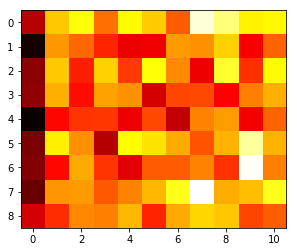

In [12]:
plt.imshow(predTrainScoreNP, cmap='hot', interpolation='nearest')

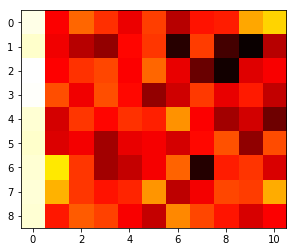

In [13]:
plt.imshow(predTestScoreNP, cmap='hot', interpolation='nearest')

In [15]:
predScoreSVR = Parallel(n_jobs=num_cores, verbose=10)(delayed(make_prediction_model)(arg1,arg2,200,1,0) for arg1,arg2 in featureOption)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   33.3s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:  2.9min
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  6.1min
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 12.6min
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed: 27.1min
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed: 53.1min
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed: 103.4min
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed: 173.3min
[Parallel(n_jobs=8)]: Done  94 out of  99 | elapsed: 264.5min remaining: 14.1min
[Parallel(n_jobs=8)]: Done  99 out of  99 | elapsed: 322.3min finished


In [18]:
#now lets separate train and test scores
predTrainScoreSVR = []
predTestScoreSVR = []
for i in predScoreSVR:
    predTrainScoreSVR.append(i[0])
    predTestScoreSVR.append(i[1])
    
#make numpy array from them
predTrainScoreSVRNP = np.asarray(predTrainScoreSVR)
predTestScoreSVRNP = np.asarray(predTestScoreSVR)
#and reshape them in 2D formate
predTrainScoreSVRNP = predTrainScoreSVRNP.reshape(9,11)
predTestScoreSVRNP = predTestScoreSVRNP.reshape(9,11)

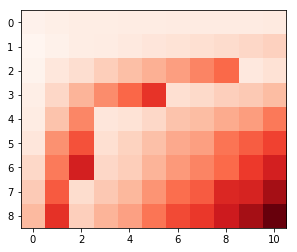

In [20]:
plt.imshow(predTrainScoreSVRNP, cmap='Reds', interpolation='nearest')

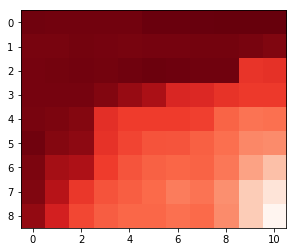

In [21]:
plt.imshow(predTestScoreSVRNP, cmap='Reds', interpolation='nearest')

84 86
93 95
(1403, 49)
(1403, 1)
(1203,)


/home/jcharla/anaconda3/envs/lipor_gpu_env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9068374306315815
0.6762072773604435
84 86
93 95
(1403, 49)
(1403, 1)
(1203,)


/home/jcharla/anaconda3/envs/lipor_gpu_env/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/home/jcharla/anaconda3/envs/lipor_gpu_env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8975751681355109
0.7282962358378613


/home/jcharla/anaconda3/envs/lipor_gpu_env/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


(0.8975751681355109, 0.7282962358378613)

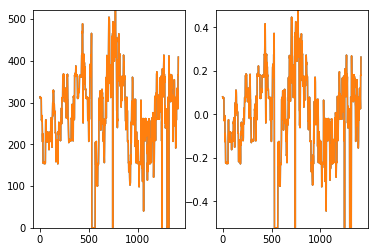

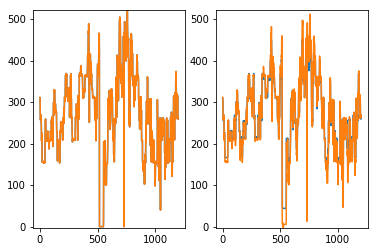

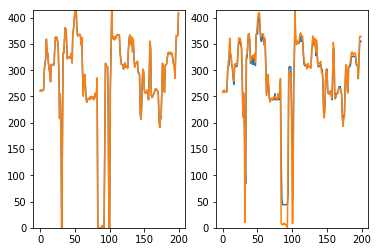

In [7]:
make_xgboost_prediction_model(1,12,200,1,1)
make_prediction_model(1,12,200,1,1)